<a href="https://colab.research.google.com/github/LuuZwide/Cartpole/blob/main/Actor_Critic_Cartpole.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gym[classic_control]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#imports

import gym
import numpy as np
import tensorflow as tf
from tensorflow.keras import Model,layers
from tensorflow.keras.optimizers import Adam
import tensorflow_probability as tfp
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [ ]:
env = gym.make('CartPole-v1',new_step_api=True)

In [ ]:
#Actor-Critic Model

class ActorCritic(Model):
  def __init__(self, num_actions, obsv_space, dim_size1 = 256, dim_size2 = 256):
    super(ActorCritic,self).__init__()
    self.num_actions = num_actions
    self.obsv_space = obsv_space
    self.layer_1 = dim_size1
    self.layer_2 = dim_size2

    self.dense_layer1 = layers.Dense(self.layer_1, activation = 'relu')
    self.dense_layer2 = layers.Dense(self.layer_2, activation = 'relu')
    self.value_func = layers.Dense(1)
    self.policy = layers.Dense(self.num_actions,'softmax')

  def call(self, state):
    val = self.dense_layer1(state)
    common = self.dense_layer2(val)

    critic = self.value_func(common)
    actor = self.policy(common)

    return critic, actor


In [ ]:
from tensorflow.python.framework.ops import convert_n_to_tensor
class Agent():
  def __init__(self,num_actions, obsv_space, layer1_size, layer2_size, gamma, learning_rate):
    self.num_actions = num_actions
    self.obsv_space = obsv_space
    self.layer_size1 = layer1_size
    self.layer_size2 = layer2_size
    self.gamma = gamma
    self.learning_rate = learning_rate

    self.actor_critic = ActorCritic(self.num_actions, self.obsv_space, self.layer_size1, self.layer_size2)
    self.actor_critic.compile(optimizer = Adam(learning_rate = self.learning_rate))

  def choose_action(self, state):
    state = tf.convert_to_tensor([state])
    _,probs = self.actor_critic(state)
    action_probs = tfp.distributions.Categorical(probs = probs)
    print('Action Probs',probs)
    self.action = action_probs.sample()
    self.action = self.action.numpy()[0]
    return self.action

  def learn(self, obsv, action, reward, next_obsv, done):
    state = tf.convert_to_tensor([obsv], dtype= tf.float32)
    state_ = tf.convert_to_tensor([next_obsv], dtype = tf.float32)
    reward = tf.convert_to_tensor(reward, dtype = tf.float32)

    with tf.GradientTape() as tape:
      state_value, probs = self.actor_critic(state)
      next_state_value, _ = self.actor_critic(state_)

      state_value = tf.squeeze(state_value)
      state_value_ = tf.squeeze(next_state_value)

      #action_probs = tfp.distributions.Categorical(probs = probs)
      log_probs = action_probs.log_prob(action)

      delta = reward + state_value_*self.gamma*(1-int(done)) - state_value
      actor_loss = -log_probs*delta
      critic_loss = delta**2

      total_loss = actor_loss + critic_lo
      ss

    gradients = tape.gradient(total_loss, self.actor_critic.trainable_variables)
    self.actor_critic.optimizer.apply_gradients(zip(gradients, self.actor_critic.trainable_variables))

In [ ]:
def learn(self, obsv, action, reward, next_obsv, done):
    state = tf.convert_to_tensor([obsv], dtype=tf.float32)
    state_ = tf.convert_to_tensor([next_obsv], dtype=tf.float32)
    reward = tf.convert_to_tensor(reward, dtype=tf.float32)
    weights = tf.convert_to_tensor([action], dtype=tf.float32)

    with tf.GradientTape() as tape:
        state_value, probs = self.actor_critic(state)
        next_state_value, _ = self.actor_critic(state_)

        state_value = tf.squeeze(state_value)
        state_value_ = tf.squeeze(next_state_value)

        # Define a probability distribution over the weights
        action_probs = tfp.distributions.Categorical(probs=probs)
        log_probs = action_probs.log_prob(weights)

        delta = reward + state_value_ * self.gamma * (1 - int(done)) - state_value
        actor_loss = -log_probs * delta
        critic_loss = delta ** 2
        total_loss = actor_loss + critic_loss

    gradients = tape.gradient(total_loss, self.actor_critic.trainable_variables)
    self.actor_critic.optimizer.apply_gradients(zip(gradients, self.actor_critic.trainable_variables))


In [ ]:
state_size = env.observation_space.shape[0] # the size of each env space observation
action_size = env.env.action_space.n # number of actions that can be performed
layer1_size = 1024
layer2_size = 512
learning_rate =1e-5
num_episodes = 30000
gamma = 0.95
SEED = 3
agent = Agent(num_actions = action_size, obsv_space = state_size, layer1_size = layer1_size, layer2_size = layer2_size, gamma = gamma, learning_rate = learning_rate)

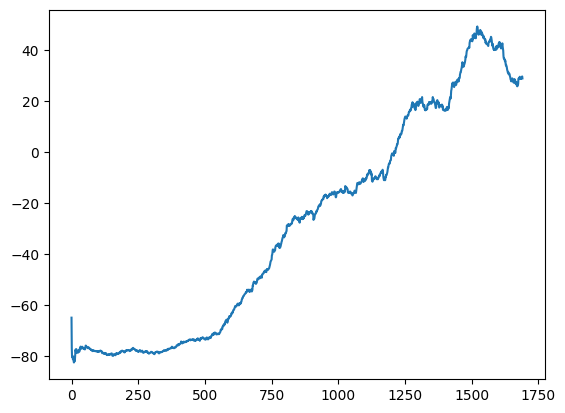

Action Probs tf.Tensor([[0.23240764 0.7675924 ]], shape=(1, 2), dtype=float32)
Action Probs tf.Tensor([[0.97831    0.02168996]], shape=(1, 2), dtype=float32)
Action Probs tf.Tensor([[0.18898086 0.8110192 ]], shape=(1, 2), dtype=float32)
Action Probs tf.Tensor([[0.97479814 0.02520181]], shape=(1, 2), dtype=float32)
Action Probs tf.Tensor([[9.9907696e-01 9.2302845e-04]], shape=(1, 2), dtype=float32)
Action Probs tf.Tensor([[0.973697 0.026303]], shape=(1, 2), dtype=float32)
Action Probs tf.Tensor([[0.15910195 0.84089804]], shape=(1, 2), dtype=float32)
Action Probs tf.Tensor([[0.97308326 0.02691677]], shape=(1, 2), dtype=float32)
Action Probs tf.Tensor([[0.15678513 0.8432149 ]], shape=(1, 2), dtype=float32)
Action Probs tf.Tensor([[0.9731163  0.02688368]], shape=(1, 2), dtype=float32)
Action Probs tf.Tensor([[0.15931208 0.84068793]], shape=(1, 2), dtype=float32)
Action Probs tf.Tensor([[0.97378355 0.02621639]], shape=(1, 2), dtype=float32)
Action Probs tf.Tensor([[0.16685471 0.83314526]], 

In [ ]:
avg_scores = []
score_history = []
for e in range(num_episodes):
  state = env.reset(seed = SEED)
  done,trunc = (False,False)
  step = 0
  while not (done or trunc):
    action = agent.choose_action(state)
    next_state, reward, done, trunc,_ = env.step(action)
    if not (done or trunc):
      step += reward
    else:
      step += -100
      reward = -100
    agent.learn(obsv = state, action = action, reward = reward, next_obsv = next_state, done = done)
    state = next_state

  score_history.append(step)
  avg_score = np.mean(score_history[-100:])
  avg_scores.append(avg_score)
  if e % 10 == 0 or e < 10:
    clear_output(wait=True)
    plt.plot(avg_scores)
    plt.show()